In [4]:
using Distributions, Optim, LinearAlgebra, Plots, StatsPlots
using CSV, DataFrames

In [5]:
# Import data
df = DataFrame(CSV.File("/Users/maishamaliha/Documents/BIOLOGY~VIP/nlcd_sage_beryl_1988.csv"))

,nlcd_sage_1988_mos_rec_v1,nlcd_sage_1989_mos_rec_v1,nlcd_sage_1990_mos_rec_v1
,Int64,Int64,Int64
1,0,5,8
2,0,5,8
3,0,5,8
4,0,5,8
5,0,5,8
6,0,5,8
7,0,5,8
8,0,5,8
9,0,5,8


In [6]:
#starting with 30 patches

In [7]:
dfn = Matrix{Int64}(df[1:30,:])

30×30 Matrix{Int64}:
 0  5  8  10   9  13  15  14  14  15  …  15  15  15  15  15  15  15  15  15
 0  5  8  10  12  13  17  16  17  17     17  17  17  17  17  17  17  17  17
 0  5  8  10  13  13  15  14  14  24     26  26  26  26  26  26  26  26  26
 0  5  8  10  13  15  14  15  15  24     26  26  26  26  26  26  26  26  26
 0  5  8   8   9  10  11  14  13  14     14  14  14  14  14  14  14  14  14
 0  5  8  10   9  15  18  18  17  18  …  18  18  18  18  18  18  18  18  18
 0  5  8  10  10  15  15  14  13  15     15  15  15  15  15  15  15  15  15
 0  5  8  10  11  13  14  13  14  18     18  18  18  18  18  18  18  18  18
 0  5  8  10  11  13  17  16  15  17     17  17  17  17  17  17  17  17  17
 0  5  8   9   8  15  17  17  16  15     13  17  17  17  17  17  17  17  17
 0  5  8   9   9  14  18  19  19  19  …  17  19  19  19  19  19  19  19  19
 0  5  6   5   9  10  12  12  11  12     12  12  11  12  12  12  12  12  12
 0  0  6   6   5  10  10  10  10  10      9  10  10  11  10  10  10

In [8]:
# reshape the data
Y = vec(dfn[:, 2:end])
X = vec(dfn[:, 1:end-1])
describe(Y)
Y = Y[X .> 0]
X = log.(X[X .> 0])

Summary Stats:
Length:         870
Missing Count:  0
Mean:           13.822989
Minimum:        0.000000
1st Quartile:   11.000000
Median:         14.000000
3rd Quartile:   17.000000
Maximum:        26.000000
Type:           Int64


836-element Vector{Float64}:
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 1.6094379124341003
 ⋮
 2.8903717578961645
 2.6390573296152584
 2.3978952727983707
 2.4849066497880004
 2.1972245773362196
 2.1972245773362196
 2.3978952727983707
 2.5649493574615367
 2.70805020110221
 2.302585092994046
 2.70805020110221
 3.1780538303479458

In [9]:
# define a simple Beverton-Holt (or some other growth) function
bh(x,p) = x .* (p[1] ./ (1 .+ x ./ p[2]))


bh (generic function with 1 method)

In [11]:
import Pkg; Pkg.add("MCMCChains")
using Turing
using MCMCChains

import Pkg; Pkg.add("Turing")
# === Turing implementation
using Turing
n = length(Y)

@model poisson_regression(X1, Y, n) = begin
    b0 ~ truncated(Normal(0, 1), 0, Inf)
    b1 ~ truncated(Normal(0, 5), 0.01, Inf)

    for i = 1:n
        theta = X1[i] * (b0 / (1 + X1[i] / b1))
        Y[i] ~ Poisson(exp(theta))
    end
end;

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Qt5Base_jll ─ v5.15.3+1
  No Changes to `~/.julia/environments/v1.6/Project.toml`
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
Precompiling project...
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✓ StatsPlots
  5 dependencies successfully precompiled in 47 seconds (254 already precompiled)
  3 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ Plots
  ✓ StatsPlots
  2 dependencies successfully precompiled in 37 seconds (257 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [12]:
import Pkg;Pkg.add("Random")


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
Precompiling project...
  ✓ Plots
  ✓ StatsPlots
  2 dependencies successfully precompiled in 37 seconds (257 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [14]:
# Sample using NUTS.
using Random
Random.seed!(700)
num_chains = 4
m = poisson_regression(X, Y, n)
chain = sample(m, NUTS(200, 0.65), MCMCThreads(), 500, num_chains; discard_adapt=true)

# sampler = NUTS(200, 0.65); chain = sample(m, sampler, MCMCThreads(), 500, num_chains; discard_adapt = true)

# Taking the first chain
c1 = chain[:,:,1]

# Calculating the exponentiated means
b0_exp = exp(mean(c1[:b0]))
b1_exp = exp(mean(c1[:b1]))

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC /Users/maishamaliha/.julia/packages/AbstractMCMC/0eT8o/src/sample.jl:291
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/maishamaliha/.julia/packages/AdvancedHMC/w90s5/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/maishamaliha/.julia/packages/AdvancedHMC/w90s5/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/maishamaliha/.julia/packages/AdvancedHMC/w90s5/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, true, false)
└ @ Advan

114106.25913231923

In [15]:
chain


Chains MCMC chain (500×14×4 Array{Float64, 3}):

Iterations        = 201:1:700
Number of chains  = 4
Samples per chain = 500
Wall duration     = 3.83 seconds
Compute duration  = 3.82 seconds
parameters        = b0, b1
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          b0    1.2471    0.0401     0.0009    0.0019   384.1976    1.0067     ⋯
          b1   11.8213    2.0025     0.0448    0.1042   336.9918    1.0070     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          b0

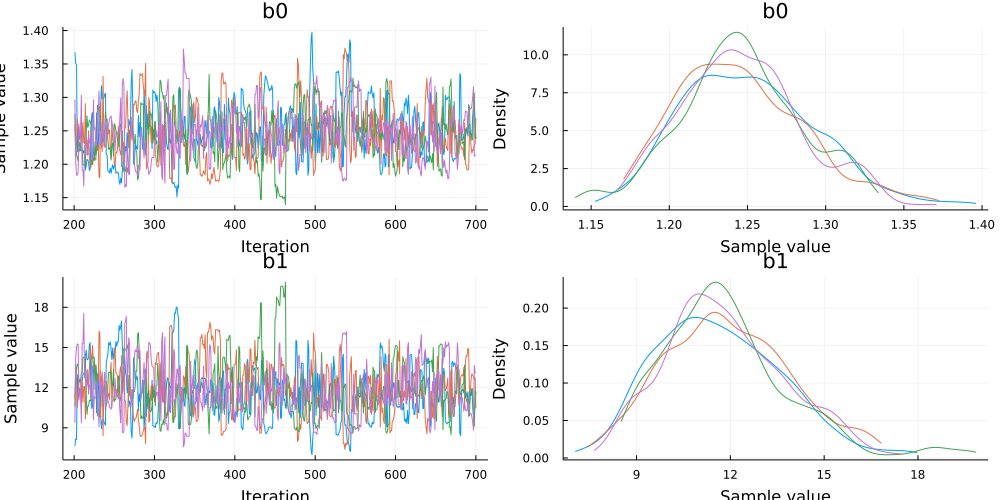

In [16]:
plot(chain)

In [27]:
para = Array(chain)

2000×2 Matrix{Float64}:
 1.36764   7.65707
 1.35081   8.1733
 1.34897   8.11688
 1.21869  12.9733
 1.25546  11.2018
 1.2481   11.4445
 1.23681  11.9713
 1.24861  11.7583
 1.2463   11.6112
 1.2225   12.4513
 1.21706  12.9542
 1.22063  13.0767
 1.21296  12.9877
 ⋮        
 1.27745  10.2482
 1.24972  11.2543
 1.28309  10.027
 1.28351  10.0385
 1.28351  10.0385
 1.28282  10.0728
 1.28848   9.81033
 1.29997   9.41466
 1.31584   8.83156
 1.21184  13.6611
 1.21374  13.1088
 1.21374  13.1088

In [29]:
param= DataFrame(R = para[:,1], K = para[:,2])

,R,K
,Float64,Float64
1,1.36764,7.65707
2,1.35081,8.1733
3,1.34897,8.11688
4,1.21869,12.9733
5,1.25546,11.2018
6,1.2481,11.4445
7,1.23681,11.9713
8,1.24861,11.7583
9,1.2463,11.6112


In [20]:
using CSV

In [30]:
CSV.write("Documents\\beryl_param.csv",param)

"Documents\\beryl_param.csv"

In [31]:
Pkg.add("JLD")

   Resolving package versions...
   Installed Blosc ───── v0.7.3
   Installed Lz4_jll ─── v1.9.3+0
   Installed Blosc_jll ─ v1.21.1+0
   Installed HDF5_jll ── v1.12.1+0
   Installed JLD ─────── v0.12.3
   Installed HDF5 ────── v0.15.7
   Installed FileIO ──── v1.14.0
    Updating `~/.julia/environments/v1.6/Project.toml`
  [4138dd39] + JLD v0.12.3
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [a74b3585] + Blosc v0.7.3
  [5789e2e9] + FileIO v1.14.0
  [f67ccb44] + HDF5 v0.15.7
  [4138dd39] + JLD v0.12.3
  [0b7ba130] + Blosc_jll v1.21.1+0
  [0234f1f7] + HDF5_jll v1.12.1+0
  [5ced341a] + Lz4_jll v1.9.3+0
    Building HDF5 → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/698c099c6613d7b7f151832868728f426abe698b/build.log`
Precompiling project...
  ✓ HDF5_jll
  ✓ Lz4_jll
  ✓ FileIO
  ✓ Blosc_jll
  ✓ Blosc
  ✓ HDF5
  ✓ JLD
  ✓ Plots
  ✓ StatsPlots
  9 dependencies successfully precompiled in 38 seconds (257 already precompiled)
  2 dependencies precompiled but differ

In [32]:
using JLD

In [38]:
JLD.save("Documents/beryl_poisson_fit.jld","fit",chain)